In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [4]:
def readData():   
    import numpy as np
   
    data = pd.read_csv('WindramTrainingData.csv', index_col = [0])
    metadata = pd.read_csv('WindramMetaData.csv', index_col = [0])
    
    #data = pd.read_csv('selectedGenes_Marques1.csv', index_col = [0])
    df = pd.DataFrame(data)
    
    colsums = df.sum(axis=0)
    #print(colsums)
    normalized = df.div(colsums)
    #print(array, "_", colsums)
    #print(normalized.shape)
    data1 = normalized
    #data1 = np.transpose(normalized)
    return data, data1, metadata

In [55]:
from collections import Counter

data, data1, metadata = readData()
actual_capture_time = metadata['obstime'].values


unique = set(actual_capture_time)
count_array = Counter(actual_capture_time) 
unique = list(unique)

unique = sorted(unique, reverse=False)
print(unique)

print(count_array)

[6, 18, 30, 42]
Counter({6: 6, 18: 6, 30: 6, 42: 6})


In [83]:
def data_manipulation(data, unique):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    #make this example reproducible
    seed(1)
    
    data_with_captureTime = data.copy()
    n = data.shape[1]
    m = data.shape[0]
    
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (m)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    print(dfIni.shape)
    
    array1 = np.arange(1, 201, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    
    for k in range(1, len(unique)+1):
            normDist.loc[k] =  normal(loc=unique[k-1], scale=1.5, size=200)
    
    for i in range(len(data)):
        arr1 = []
        arr = []
        for j in range(len(unique)):

            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[unique[j]]))
            #print(arr)
            if j == 0 :
                #generate random values from Poisson distribution with mean=3 and sample size=10
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
                
        dfIni.loc[i+1] = arr1
               
    return dfIni

In [84]:
data_with_capture = data_manipulation(data, unique)

(100, 24)


In [85]:
print(data_with_capture)

data_temp = data.copy()

n = data.shape[1]
m = data.shape[0]
    
array1 = np.arange(1, n+1, 1)
array2 = np.arange(1, (m)+1, 1)
data_temp.index = array2
data_temp.columns = array1

data_manipulated = data_temp.mul(data_with_capture)
#print(data_manipulated)

          1        2        3        4        5        6        7        8   \
1    7.70065  4.28622   2.9667  5.84738  6.73278  5.04451   16.948  15.6918   
2    4.50446  8.95065  5.66651  5.56904   8.4897  3.15546  16.2265  19.9178   
3    5.40487  6.90348  6.74282  6.82581  5.02962  5.22436  17.2527  18.9316   
4    5.51637   6.3203  2.90979  5.89033  6.90348  7.99719  21.6741  15.3661   
5    6.25407  6.52582    6.421  5.83433  5.54069  4.96251  17.9232  18.2011   
..       ...      ...      ...      ...      ...      ...      ...      ...   
96   8.95065  4.71073  7.68213  2.34774  7.25848  7.91063  17.1202   15.359   
97   5.84738  6.47032  8.19316  7.31425  6.66205  5.66053  16.1704  19.3138   
98   6.98857  7.20279   7.4795  6.55424  7.14302  8.44148  17.6537  18.0248   
99   7.70065   6.0655  8.19316  4.56945  7.93984  4.35763  15.8602  17.3476   
100   6.9258  7.35128  5.56904  4.99401  4.03157  6.61335  14.8288  16.0414   

          9        10  ...       15       16       

In [86]:
def initialize(data, ntest, unique, count_array):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    #make this example reproducible
    seed(1)
    
    n = data.shape[1]
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (2*ntest)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    
    array1 = np.arange(1, 201, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    
    for k in range(1, len(unique)+1):
        normDist.loc[k] =  normal(loc=unique[k-1], scale=1.5, size=200)
    
    for i in range(1, (2*ntest)+1):
        arr1 = []
        arr = []
        for j in range(len(unique)):   
            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[unique[j]]))
            if j == 0 : 
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
                
        dfIni.loc[i] = arr1
                
    return dfIni

In [87]:
ntest = 60
initialSol = initialize(data, ntest, unique, count_array)

In [18]:
def crossover(p1, p2):
    print(p1,p2)
    print("p1p2")
    import math
    from numpy import nan
    from scipy import stats
    
    u = np.random.poisson(1, 1)
    if u == 0:
        u = 1
        p2 = p2.iloc[::-1]
      
    c1, c2 = p1.copy(), p2.copy()
    c11 = pd.DataFrame()
    c22 = pd.DataFrame()
    length = len(p1)

    pt = int(length/2)

    
    if u%2 == 1:
        c1[0:pt] = p1.iloc[0:pt]
        c2[(pt):length] = p2.iloc[(pt):length]
        c1[pt: length] = p2.iloc[0:pt]
        c2[0:pt] = p1.iloc[pt:length]
        
    else:
        c2[0:pt] = p2.iloc[0:pt]  
        c1[(pt):length] = p1.iloc[(pt):length]
        c2[pt: length] = p1.iloc[0:pt]
        c1[0:pt] = p2.iloc[pt:length]
        
        
    df = pd.DataFrame()
    df = df.append(c1)
    df = df.append(c2)
    #print(df)
    return df


In [19]:
def recombination(X1):
    test = X1.isnull().values.any()
    #print(test)
    
    N = X1.shape[0]
    n = X1.shape[1]
    #print(N)
    samp = random.sample(range(1,N+1),int(N/2))
    samp = set(samp)
    all = np.arange(1,N+1)
    all = set(all)

    X2 = X1.loc[samp,]

    X3 = X1.loc[all.difference(samp),]

    C1 = pd.DataFrame()
    O_samp =all.difference(samp)
    
    #print(O_samp, samp)
    check = X2.isnull().values.any()
    check1 = X3.isnull().values.any()
    #print(check, check1, "before Crossover")
    for i, j in zip(samp,O_samp):
        #print(X2.loc[i], X3.loc[j])
        
        print(">>>>>>>")
        
        check = X2.loc[i].isnull().values.any()
        check1 = X3.loc[j].isnull().values.any()
      
        
        C11 = crossover(X2.loc[i], X3.loc[j])

        print("<<<<<<")
       
        l = list(samp)
        if i== l[0]:
            C1 = C11
            #C1.append(C22)
        else:
            C1 = C1.append(C11)
            #C1.append(C22)
        
    return C1.sort_index(axis = 0)
    


In [88]:
# test = list(Individual.loc[1])
# print(test)
# print(list(c1.loc[1]))
# print(list(c1.loc[2]))
import random 
c1 = recombination(initialSol)
print(c1)
# test1 = np.unique(list(c1.loc[1])).size == len(list(c1.loc[1]))
# test2 = np.unique(list(c1.loc[2])).size == len(list(c1.loc[2]))
# print(test1, test2)

>>>>>>>
1     6.55424
2     7.55824
3     7.70065
4     7.29811
5     6.47345
6     4.87926
7     17.8193
8     18.9819
9     17.3352
10    18.3027
11     16.708
12    22.5463
13    29.7773
14    31.6485
15      31.04
16    31.9593
17    27.0718
18    28.6223
19     42.475
20    42.1436
21    42.6154
22    43.8377
23    42.5427
24    41.6719
Name: 1, dtype: object 1     4.97441
2     4.83726
3     9.27836
4     4.32403
5     6.82581
6     4.68321
7     17.5103
8     17.2527
9     17.1565
10    21.2067
11     15.359
12    18.8789
13    32.1809
14    27.3337
15    27.5438
16     32.648
17       30.7
18    28.4997
19    42.2848
20    42.5267
21    41.4612
22     43.127
23    43.5278
24    43.9403
Name: 4, dtype: object
p1p2
<<<<<<
>>>>>>>
1     6.84414
2      5.0419
3     6.52582
4     6.45026
5     8.95065
6     7.20279
7     17.0014
8     16.6983
9     17.8732
10     17.297
11    15.4887
12    17.3825
13    31.8127
14     28.875
15    30.1227
16    32.2052
17    31.6738
18    27.0718
19

<<<<<<
>>>>>>>
1     8.61722
2       5.981
3     5.74136
4     5.47599
5     7.69744
6     4.99401
7     18.4853
8     15.7933
9     19.5152
10    18.6443
11    19.1925
12    17.7017
13    29.1092
14    28.7228
15      32.42
16    29.6569
17    30.2716
18    30.8362
19    42.7427
20    43.8356
21    42.0269
22    41.1059
23    43.2898
24    40.2769
Name: 28, dtype: object 1     3.94032
2     7.25848
3     9.27836
4     5.89033
5     5.81566
6     3.57634
7     20.1771
8      16.958
9     18.0248
10     19.789
11    18.9915
12    17.6187
13    29.3008
14    32.7997
15    30.7933
16    30.9453
17     29.909
18    31.7967
19    42.1084
20    43.5147
21     39.089
22    41.9712
23    39.1779
24    42.1687
Name: 44, dtype: object
p1p2
<<<<<<
>>>>>>>
1       6.421
2     7.35128
3      6.7942
4      6.9258
5     5.69886
6     7.69744
7     18.2658
8     19.0917
9     19.1918
10    18.7726
11    16.6983
12    18.2344
13    31.7967
14    31.6608
15    30.6752
16    29.4699
17    26.7863
18    2

>>>>>>>
1     8.53868
2     7.04705
3     5.73795
4       6.421
5     5.04451
6     8.19316
7     19.2369
8     19.2791
9     17.1942
10    19.5152
11    17.6453
12    15.8602
13    29.4378
14    32.7795
15    31.0696
16    29.1092
17    28.2597
18    29.4228
19     42.356
20    41.1113
21    40.5719
22    40.2769
23    40.6097
24    40.6263
Name: 70, dtype: object 1     4.96251
2     6.55424
3     6.84414
4     6.82581
5     6.63524
6     5.55504
7     20.6519
8      17.008
9     15.4887
10    21.6741
11    18.0128
12    16.1447
13    30.1297
14    30.9453
15    30.7731
16    28.3298
17    30.1227
18    27.6313
19    39.8079
20    42.8851
21      41.11
22     42.654
23    41.3158
24    41.1113
Name: 73, dtype: object
p1p2
<<<<<<
>>>>>>>
1     5.20774
2     7.56666
3     9.27836
4     8.61722
5     8.43652
6     7.11083
7     16.6841
8     20.7158
9      19.254
10    19.8031
11     16.708
12    17.3476
13    31.5495
14    29.2373
15    29.1543
16    29.3101
17    30.1345
18    27.7852


Name: 107, dtype: object 1     4.71073
2     7.24196
3     5.51637
4     3.57634
5     6.50702
6     6.27984
7     16.9412
8     18.0248
9     16.6841
10    18.8789
11    17.8732
12    20.7521
13    29.0983
14     28.849
15     29.062
16    26.6593
17    30.0524
18    32.1809
19    42.2016
20     42.162
21    43.8099
22    43.8356
23     40.652
24    40.9809
Name: 103, dtype: object
p1p2
<<<<<<
>>>>>>>
1     5.74136
2     7.39665
3     8.43652
4     3.55884
5     5.89033
6     4.68321
7     17.9232
8     18.7726
9     14.8288
10    17.6431
11    15.6918
12    19.2081
13    28.7663
14    31.0119
15    31.2613
16    27.7852
17    30.7664
18    32.0252
19    41.7264
20    41.2228
21    40.4778
22    41.0997
23    42.0736
24    41.2255
Name: 108, dtype: object 1     6.35162
2     8.53868
3     7.30333
4     7.79838
5     5.73795
6     6.06985
7     17.6431
8     14.8288
9     19.4088
10    18.2658
11    16.7547
12    19.9178
13    28.0402
14    31.1661
15    29.5363
16    30.8341
17    31.

In [21]:
def mutation(DataForMutation):
    N_rows = DataForMutation.shape[0]
    n_columns = DataForMutation.shape[1]
    
    
    for i in range(N_rows):
        samp = random.sample(range(0, n_columns),2)
        u1 = min(samp)
        u2 = max(samp)
      
        previous = DataForMutation.iloc[i,u1:u2]
        new = previous.iloc[::-1]
    
        DataForMutation.iloc[i,u1:u2] = list(new)

    return(DataForMutation)
    

In [89]:
forMutation = pd.DataFrame();
forMutation = pd.concat([c1,initialSol], ignore_index=True)

arrayMM = mutation(forMutation)


In [90]:
forCost = pd.DataFrame();
forCost = pd.concat([arrayMM,forMutation], ignore_index=True)

print(forCost)
index = np.array(range(1,len(forCost)+1));


          1        2        3        4        5        6        7        8   \
0    32.1809  27.3337  27.5438   32.648     30.7  28.4997  42.2848  42.5267   
1    6.84414   5.0419  6.52582  6.45026  8.95065  7.20279  17.0014  16.6983   
2    7.12562  7.83676  7.24196  5.60067  7.21643  5.72862  18.7726  42.9412   
3    4.97441  4.83726  9.27836  4.32403  6.82581  4.68321  17.5103  17.2527   
4    5.59817  5.32931  5.08237   6.3203   7.0201  5.07396  19.5152  17.8398   
..       ...      ...      ...      ...      ...      ...      ...      ...   
475  4.15491   7.8793  7.71709  8.44148  5.62594  7.68213  20.9341  18.2658   
476  7.21643   6.7942  6.82581  32.0252  32.1872  31.4498  16.8217  18.6572   
477  6.18024  3.83383  5.73795  4.71073  6.79553  4.03157  18.0911  17.3282   
478  5.42392  7.29811  5.48422  4.32403  5.89033  9.15038  15.3661  17.9972   
479  5.72015   4.8684  5.66053  16.6642  4.97441  4.99401  5.74136   18.424   

          9        10  ...       15       16       

In [25]:
def order(data):
    for i in range(len(data)):
        d = np.array(data.loc[i])
        sort_index = np.argsort(d)
        listed = list(sort_index)
        data.loc[i] = listed
        #print(data)
    return data

In [91]:

orderedData = order(forCost)
trasposed = np.transpose(orderedData)
data_Transposed = np.transpose(data)

print(trasposed)

    0    1    2    3    4    5    6    7    8    9    ...  470  471  472  473  \
1    16    1    3    3    5    2    2    5    3    3  ...    1   19    1   18   
2     1    3    5    5    2    1    1   17   13    0  ...   12   15    5   21   
3     2    2    0    1    1    0   11    4   14    2  ...   14   16    2   19   
4     5    0    4   17    0    3    0    0   17    4  ...   13   17    4    0   
5    17    5    2    0    3   18   10   10   16    5  ...    2   20    0   20   
6    15    4    1   16    4   17    9    8    5    1  ...    0   18    3   22   
7     4   10   12   14    7   16    6    9    4   12  ...    9   11    6   12   
8    13    7    9    4   11   13    7    7   15    7  ...    8   12   11   17   
9    14    6   11   15    6   11    5    1    2    8  ...    6   10    8   16   
10   12    9   10   13    9   15    3    6    1   10  ...    7   14   10   13   
11    0   11    6   12   10   14    4    3    0    6  ...   10   13    7   14   
12    3    8   13    2    8 

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
def linear1(data):
    from sklearn.linear_model import LinearRegression
    
    row = data.shape[0]
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.square(x)
   
    
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x)
    absError = y_pred - y
    absError *= -1
    #print(absError)
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis1 = absError/ RSum_SE
    
    print(basis1)
    
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis1

In [29]:
def linear2(data):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    row = data.shape[0]
    #print(row)
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.power(x,3)
    
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    #print(x_)
    
    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x_)
    absError = y_pred - y
    absError *= -1
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis2 = absError/ RSum_SE
    
    #print(basis1)
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis2

In [30]:
def linear11(cellNumber):
    x = np.array(range(1,cellNumber+1))
    mean = np.mean(x)
    #x1<-1:n
    basis11 = (x-np.mean(x))/np.sqrt(np.sum(np.square(x-np.mean(x))))
    #expls11<-apply(t(XX),1,"perm",data=t(t(basis1)))
    return basis11
    

In [92]:
basis11 = linear11(len(data_Transposed))
basis1 = linear1(data_Transposed)
basis2 = linear2(data_Transposed)
#print((basis3))

coefficient of determination: 0.9424952246908616
intercept: [-108.33333333]
slope: [[25.]]
[[ 0.40271514]
 [ 0.29765902]
 [ 0.20215345]
 [ 0.11619844]
 [ 0.03979399]
 [-0.02705991]
 [-0.08436325]
 [-0.13211604]
 [-0.17031826]
 [-0.19896993]
 [-0.21807105]
 [-0.2276216 ]
 [-0.2276216 ]
 [-0.21807105]
 [-0.19896993]
 [-0.17031826]
 [-0.13211604]
 [-0.08436325]
 [-0.02705991]
 [ 0.03979399]
 [ 0.11619844]
 [ 0.20215345]
 [ 0.29765902]
 [ 0.40271514]]
RMSE: 42.746019957678186
R-squared: 0.9424952246908616
coefficient of determination: 0.9961689883081876
intercept: [877.5]
slope: [[-382.7   37.5]]
RMSE: 258.0741172609139
R-squared: 0.9961689883081876


In [33]:
def permutation(basisDF, data):
    from scipy.stats import poisson
    df3 = pd.DataFrame()
    cellCount = len(basisDF)
    x = np.zeros((data.shape[0],data.shape[1]))
    for i in range(len(data)):

        data4 = data

        row = data4.iloc[i]
        
        j = 0
        for k in range(len(row)):
            index = row.iloc[j]
            #print(basisDF._get_value(index, 0))
            if(index >= cellCount):
                arr = poisson.rvs(mu = int(cellCount/2), size= 1)
                index = arr[0]
                print(index, "index")
                print(basisDF._get_value(index, 0))
            x[i][k] = basisDF._get_value(index, 0)
            j = j+1

    df3 = pd.DataFrame(x)
    df3 = np.transpose(df3)
    return df3


In [265]:
print(expls1)

           0         1         2         3         4         5         6   \
0    0.044233 -0.339116  0.073721 -0.250651 -0.191675 -0.221163  0.103209   
1   -0.309628 -0.339116  0.221163  0.309628  0.280140  0.250651  0.044233   
2   -0.191675 -0.339116 -0.309628 -0.280140 -0.221163 -0.250651 -0.073721   
3   -0.250651 -0.309628 -0.280140 -0.339116 -0.191675 -0.162186 -0.073721   
4   -0.250651 -0.309628 -0.339116 -0.280140 -0.221163 -0.191675 -0.073721   
..        ...       ...       ...       ...       ...       ...       ...   
475 -0.221163 -0.309628 -0.250651 -0.280140 -0.191675 -0.339116 -0.132698   
476 -0.014744 -0.073721  0.044233  0.014744 -0.044233 -0.103209 -0.280140   
477 -0.221163 -0.339116 -0.250651 -0.191675 -0.309628 -0.280140 -0.103209   
478 -0.221163 -0.191675 -0.339116 -0.250651 -0.309628 -0.280140 -0.073721   
479 -0.309628 -0.280140 -0.191675 -0.250651 -0.221163 -0.339116 -0.014744   

           7         8         9   ...        14        15        16  \
0  

In [93]:
basis11DF = pd.DataFrame(basis11)
expls1 = permutation(basis11DF, trasposed)
#newexpls1 = expls1.mul(normalized_time)
#print(newexpls1)

basis1DF = pd.DataFrame(basis1)
expls2 = permutation(basis1DF, trasposed)
#newexpls2 = expls2.mul(normalized_time)
#print(expls2)

basis2DF = pd.DataFrame(basis2)
expls3 = permutation(basis2DF, trasposed)
#newexpls3 = expls3.mul(normalized_time)


In [94]:
forBeta = pd.concat([expls1,expls2,expls3], axis = 0)
#print(forBeta)
# forBeta2 = pd.concat([newexpls1, newexpls2, newexpls3], axis = 0)
# print(forBeta2)

In [95]:
#print(data_ranked.shape)
print(forBeta.shape)
forBeta_transpose = np.transpose(forBeta)
#data_ranked_transpose = np.transpose(data_ranked)
beta1 = np.dot(data_manipulated,forBeta_transpose) # data
print(beta1.shape)
print(beta1)

#print(sumsqr_new.shape)

(1440, 24)
(100, 1440)
[[221.40045927894093 406.01845304145985 357.0874223184298 ...
  -60.181039724186945 -21.455257188898408 -55.09413373142262]
 [397.8052241580304 752.0019194977765 658.3943546961892 ...
  -114.34342016453218 -177.25603861315952 -173.23726606108352]
 [159.26356616142354 331.01266638172626 306.19241907456154 ...
  -72.86346358146093 -46.433594151164876 -43.13934109070725]
 ...
 [297.86808539698933 525.5577526897318 444.8148038262916 ...
  -60.288697285924556 -101.01289803550873 -100.59863176754179]
 [376.58458002485656 720.2816088974254 644.1888617707302 ...
  -108.73570531714448 -148.28642084614148 -137.80783062675314]
 [233.77295507756727 493.74053259963557 425.7762881739866 ...
  -61.50689416260251 -79.16868546789246 -81.85288907067918]]


In [38]:
def sqrsum_sumsqr(ntest, data_ranked):
    print(data_ranked.shape)
    squared = np.square(data_ranked)
    sumsqr = squared.sum(axis = 0)
    print(squared, "_", sumsqr)
    colMeans = np.mean(data_ranked, axis = 0)
    sqrsum = np.square(colMeans)
#     print(sqrsum)
#     print(sumsqr)
    #sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)
    
    cellNumber = len(data_ranked)
    sqrsum_df *=cellNumber
    #print(sqrsum_df)
    
    ntest = ntest
    #print(ntest)
    
    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()
    
    for i in range(int(8*ntest)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)
    
    for i in range(int(8*ntest)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    return sumsqr_new, sqrsum_new, sumsqr, sqrsum

In [96]:
ntest = 60
data_manipulated_transpose = np.transpose(data_manipulated)
print(data_manipulated_transpose)
sumsqr_new, sqrsum_new, sumsqr, sqrsum = sqrsum_sumsqr(ntest, data_manipulated_transpose) #data_Transposed

        1        2        3        4        5        6        7        8    \
1   74.2924  54.1658  36.6926  43.2037  45.8355  77.9525  64.9282  71.3044   
2   42.0586  111.279  45.1235   51.099  57.6917     65.8  99.8471  70.3404   
3   29.3239  72.5759  37.5144  21.6531  53.9838  58.8522   107.18  44.9225   
4   58.4044  72.1083  36.8824   46.275   44.346  63.4618  127.309  47.2662   
5   66.6814   108.46    28.47    54.51   46.705  70.2844  86.7905  63.4041   
6   51.4627  40.7125  37.3285  60.7712  41.2657  46.0684  56.9421  44.4538   
7   169.347  213.026  93.9547  173.186  164.519  154.606  256.524  225.001   
8   160.462  255.566  125.323  123.708  159.466  176.483  221.885  193.098   
9   187.143  255.899  124.012   126.38   173.56  162.042  246.326  152.304   
10   169.64  214.916  107.252  160.781  157.592  187.238  255.706  168.604   
11   152.19  213.373  96.8142  128.671  181.704  166.689  249.618  166.959   
12  155.599  233.521  130.056  151.352  178.529  173.516  235.32

                0             0             0             0             0  \
1    1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06   
2    3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06   
3    7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05   
4    1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06   
5    2.055777e+06  2.055777e+06  2.055777e+06  2.055777e+06  2.055777e+06   
..            ...           ...           ...           ...           ...   
96   8.062482e+05  8.062482e+05  8.062482e+05  8.062482e+05  8.062482e+05   
97   1.973930e+06  1.973930e+06  1.973930e+06  1.973930e+06  1.973930e+06   
98   1.875334e+06  1.875334e+06  1.875334e+06  1.875334e+06  1.875334e+06   
99   3.424277e+06  3.424277e+06  3.424277e+06  3.424277e+06  3.424277e+06   
100  1.603453e+06  1.603453e+06  1.603453e+06  1.603453e+06  1.603453e+06   

                0             0             0             0             0  

In [97]:
print(sumsqr_new.shape)
# print(sqrsum_new)

resid1 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:480])
print(resid1.shape)
resid2 = resid1 - np.square(beta1[:,480:960])
print(resid1.shape)
resid3 = resid2 - np.square(beta1[:,960:1440])
print(resid1)


(100, 480)
(100, 480)
(100, 480)
          0        0        0       0        0       0        0       0  \
1    243962   128129   165469  219769   126897  289526   172193  184558   
2    690587   283329   415353  646074   280025  827325   382394  437517   
3    151427  67222.5  83038.1  138148  62526.2  173136  86687.3  102915   
4    255896   114806   163849  211012   118921  294733   164222  163069   
5    465696   184751   267787  424397   180743  545315   262566  297774   
..      ...      ...      ...     ...      ...     ...      ...     ...   
96   157600  61911.4    94462  136243  62872.7  176320  86714.9  103629   
97   358880   155460   219574  299359   147937  402100   214992  250456   
98   383316   195830   274181  349736   198219  469922   240542  253429   
99   712892   335903   439729  675571   333619  846450   437396  502100   
100  331697   142567   205061  283110   139976  381448   201513  212551   

          0        0  ...       0       0        0       0        

In [41]:
import math
def findBIC(res, k, n):   
      w = np.ones(n)
      ll = 0.5 * (np.sum(np.log(w)) - n * (np.log(2 * math.pi) + 1 - np.log(n) + np.log(res)))
      print(ll)
      val = (k+2)*np.log(n)-2*ll
      return(val)

In [98]:
cellsCount = data.shape[1]
print(cellsCount)

24


In [99]:
cellsCount = data.shape[1]

# Convert all columns to int dtype.
resid11 = resid1.astype('int') 
resid21 = resid2.astype('int')
resid31 = resid3.astype('int')

bic1= findBIC(resid11,1,cellsCount)
# print(bic1.loc[2])
bic2 = findBIC(resid21,2,cellsCount)
# print(bic2.loc[2])
bic3 = findBIC(resid31,3,cellsCount)
print(bic3)

bic1_a = np.array(bic1)
bic2_a = np.array(bic2)
bic3_a = np.array(bic3)

minBic = np.minimum(bic1_a,bic2_a)
minBic = np.minimum(bic3_a, minBic)

bicMIN = pd.DataFrame(minBic)
print(bicMIN)

              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0           0           0

In [44]:
def order_2(data):
    #for i in range(len(data)):
    d = np.array(data)
    sort_index = np.argsort(d)
    listed = list(sort_index)
    #data.loc[i] = listed
    #print(data)
    #print(type(listed))
    
    return listed

In [71]:
bicMIN = pd.DataFrame(minBic)
#print(bicMIN)
cost = bicMIN.sum(axis=0)
#print((cost))
bicCost = order_2(cost)
len_cost = (len(bicCost))
#print(bicCost)


In [101]:
# print("forCost",forCost)
# print("bicCost",bicCost[0:int(len_cost/4)])
len_cost = (len(bicCost))
sndIndiv = forCost.loc[bicCost[0:int(len_cost/4)]]
#print(sndIndiv)
#mininit = 100

In [102]:
print(cost)
priliCost = cost
#print(priliCost)
#mininit = 

0      30982.041938
1      29262.747966
2      30463.545155
3      29952.829117
4      29832.034050
           ...     
475    30170.043513
476    29879.101704
477    30149.866460
478    27527.568974
479    29689.308787
Length: 480, dtype: float64


In [103]:
mininit = 30
costmat = pd.DataFrame(0, index=np.arange(mininit), columns=np.arange(8*ntest))
#print(costmat)

In [53]:

#costmat = array(0,dim<-c(minit,(8*ntest)))
def iteration(data, priliCost,  sqrsum_new, sumsqr_new):
    Individual = data
    
   
    #print(sndIndiv22)
    #iteration(sndIndiv, priliCost)
   
    for i in range(mininit):
        
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        cells_no = sndIndiv.shape[1]
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new, cells_no)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        priliCost = cost44
        costmat.loc[i] = cost44
    eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_Transposed.shape)
    cost11 = min(costmat.loc[(mininit-2),])
    cost22 = min(costmat.loc[mininit-1,])

    while eps > 0.0001:
        print(eps, "}}}}}}}}}}}}}}")
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        cells_no = sndIndiv.shape[1]
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new, cells_no)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        prilicost = cost44
        cost11 = cost22
        cost22 = min(cost44)

        eps = abs(cost11 - cost22)/np.prod(data.shape)
        #eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_ranked.shape)
    return eps, costmat, Individual  

In [104]:
#print(len(sumsqr), len(sqrsum))
#print(sndIndiv.loc[100])
#sndIndiv.isnull().values.any()
#print(costmat.shape)

#print(np.corrcoef(sndIndiv.loc[3], sndIndiv.loc[4]))
eps, costmat, result = iteration(sndIndiv, priliCost, sumsqr, sqrsum)
print(result)
# result3 = result
# result3.sort_index(axis = 0)

Individual (120, 24)
>>>>>>>
0      3
1      4
2      5
3      1
4      0
5      2
6     17
7     15
8     16
9     18
10    14
11    13
12    11
13    10
14    12
15     8
16     9
17     7
18    23
19    20
20     6
21    22
22    19
23    21
Name: 1, dtype: int64 0     13
1     15
2     14
3     10
4     11
5     12
6      6
7      5
8      7
9      9
10     4
11     8
12    16
13     1
14     0
15     2
16     3
17    17
18    23
19    19
20    22
21    20
22    18
23    21
Name: 4, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      3
1      4
2      5
3      1
4      0
5      2
6     17
7     15
8     16
9     18
10    14
11    13
12    11
13    10
14    12
15     8
16     9
17     7
18    23
19    20
20     6
21    22
22    19
23    21
Name: 2, dtype: int64 0      2
1      5
2      4
3      1
4      3
5      0
6     11
7     10
8      8
9      6
10     7
11     9
12    12
13    16
14    17
15    15
16    14
17    13
18    19
19    20
20    22
21    18
22    23
23    21
Name: 6, dtype: int64

<<<<<<
>>>>>>>
0      2
1      0
2      1
3      4
4      3
5      5
6      7
7      9
8      6
9     11
10     8
11    10
12    20
13    21
14    19
15    12
16    13
17    18
18    22
19    14
20    15
21    16
22    17
23    23
Name: 61, dtype: int64 0      0
1      1
2      3
3      5
4      4
5      2
6      6
7      7
8     15
9     14
10    16
11    17
12     9
13    11
14    13
15    10
16     8
17    12
18    22
19    21
20    20
21    18
22    19
23    23
Name: 56, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      3
1      1
2      0
3      2
4      4
5      5
6      8
7      6
8      7
9     10
10     9
11    11
12    17
13    12
14    18
15    16
16    14
17    15
18    13
19    19
20    20
21    21
22    23
23    22
Name: 64, dtype: int64 0      0
1      5
2      2
3      4
4      3
5      1
6      8
7      6
8      9
9     11
10    10
11     7
12    15
13    20
14    18
15    19
16    17
17    16
18    12
19    21
20    23
21    14
22    13
23    22
Name: 58, dtype: int64
p1p2
<<<<

<<<<<<
>>>>>>>
0      0
1      2
2      1
3      5
4      4
5      3
6      6
7      7
8     16
9      8
10     9
11    10
12    13
13    17
14    14
15    15
16    12
17    11
18    20
19    18
20    19
21    22
22    21
23    23
Name: 115, dtype: int64 0     17
1     22
2     19
3     20
4     21
5     18
6     13
7     16
8     14
9     11
10    15
11    12
12     7
13     5
14     6
15     9
16     8
17    10
18     3
19    23
20     1
21     0
22     2
23     4
Name: 108, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      0
1      4
2      5
3      3
4      2
5      1
6      7
7      6
8     11
9      9
10    12
11     8
12    15
13    13
14    17
15    10
16    14
17    16
18    19
19    18
20    21
21    22
22    20
23    23
Name: 117, dtype: int64 0      2
1      5
2      1
3      3
4      0
5      4
6      6
7      9
8     10
9      8
10     7
11    11
12    16
13    14
14    18
15    12
16    13
17    15
18    19
19    17
20    21
21    23
22    20
23    22
Name: 110, dtype: int64
p1p2


(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

Individual (120, 24)
>>>>>>>
0      2.0
1      5.0
2      4.0
3      0.0
4      3.0
5      1.0
6     10.0
7     11.0
8      6.0
9      8.0
10     9.0
11     7.0
12    19.0
13    18.0
14    22.0
15    23.0
16    20.0
17    21.0
18    12.0
19    15.0
20    17.0
21    16.0
22    14.0
23    13.0
Name: 1, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 2, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 3, dtype: float64 0      2.0
1     12.0
2      4.0
3     17.0
4      5.0
5     14.0
6      3.0
7     15.0
8      1.0
9     13.0
10     0.0
11    16.0
12    21.0
13    11.0
14     6.0
15    23.0
16     

<<<<<<
>>>>>>>
0      1.0
1     16.0
2      4.0
3      2.0
4      3.0
5      0.0
6      7.0
7     23.0
8     18.0
9      6.0
10     9.0
11    22.0
12    19.0
13    11.0
14    10.0
15    21.0
16     8.0
17    20.0
18     5.0
19    17.0
20    13.0
21    12.0
22    14.0
23    15.0
Name: 53, dtype: float64 0     10.0
1     16.0
2     14.0
3     12.0
4      1.0
5      3.0
6      0.0
7     15.0
8     17.0
9      2.0
10    13.0
11     4.0
12    22.0
13     7.0
14     5.0
15    21.0
16    18.0
17     6.0
18    11.0
19    23.0
20    20.0
21     9.0
22    19.0
23     8.0
Name: 51, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     11.0
1      0.0
2     12.0
3     22.0
4     10.0
5     21.0
6      1.0
7     18.0
8     23.0
9      9.0
10    20.0
11     5.0
12    19.0
13     6.0
14     3.0
15    15.0
16     4.0
17     7.0
18    17.0
19    14.0
20     8.0
21    16.0
22     2.0
23    13.0
Name: 56, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 105, dtype: float64 0      0.0
1     13.0
2     14.0
3      5.0
4      2.0
5     12.0
6     15.0
7      4.0
8     11.0
9      3.0
10     1.0
11    17.0
12     7.0
13    19.0
14    16.0
15    20.0
16     6.0
17    18.0
18    22.0
19     8.0
20    10.0
21    21.0
22     9.0
23    23.0
Name: 106, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     12.0
1      5.0
2     18.0
3      8.0
4      9.0
5      2.0
6     17.0
7      0.0
8      3.0
9     13.0
10     6.0
11    14.0
12    16.0
13     4.0
14    19.0
15    15.0
16    20.0
17     1.0
18    21.0
19    11.0
20     7.0
21    23.0
22    10.0
23    22.0
Name: 107, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

Name: 3, dtype: float64 0      4.0
1     23.0
2     16.0
3      1.0
4      5.0
5     14.0
6      6.0
7      9.0
8     20.0
9      3.0
10    17.0
11    21.0
12    10.0
13     7.0
14    19.0
15     8.0
16     0.0
17     2.0
18    11.0
19    13.0
20    22.0
21    18.0
22    15.0
23    12.0
Name: 8, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 5, dtype: float64 0      9.0
1      1.0
2      3.0
3      5.0
4      6.0
5     18.0
6      8.0
7      0.0
8      2.0
9      4.0
10    17.0
11     7.0
12    21.0
13    20.0
14    19.0
15    16.0
16    11.0
17    14.0
18    13.0
19    12.0
20    22.0
21    10.0
22    15.0
23    23.0
Name: 9, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN


<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 61, dtype: float64 0     10.0
1      2.0
2      8.0
3      1.0
4      7.0
5      4.0
6     11.0
7      5.0
8      3.0
9      9.0
10     6.0
11     0.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    22.0
23    23.0
Name: 58, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     14.0
1      0.0
2      1.0
3      2.0
4      3.0
5      4.0
6     11.0
7     23.0
8     18.0
9     15.0
10    10.0
11     8.0
12     6.0
13    20.0
14    17.0
15     9.0
16    12.0
17     7.0
18    13.0
19    19.0
20    16.0
21    21.0
22    22.0
23     5.0
Name: 62, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16

<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 106, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 108, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     12.0
1     10.0
2     11.0
3      9.0
4      7.0
5      8.0
6     13.0
7     16.0
8     18.0
9     14.0
10    17.0
11    15.0
12    21.0
13    20.0
14    19.0
15     0.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 111, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 9, dtype: float64 0     21.0
1      9.0
2     20.0
3      6.0
4     15.0
5     16.0
6     17.0
7     18.0
8     19.0
9     13.0
10    14.0
11    22.0
12     7.0
13    12.0
14     5.0
15    10.0
16     4.0
17     3.0
18     2.0
19     1.0
20     0.0
21     8.0
22    11.0
23    23.0
Name: 3, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      1.0
1      4.0
2      5.0
3      7.0
4     10.0
5      0.0
6      9.0
7      6.0
8      8.0
9     17.0
10     2.0
11     3.0
12    21.0
13    20.0
14    19.0
15    18.0
16    11.0
17    15.0
18    14.0
19    13.0
20    12.0
21    22.0
22    16.0
23    23.0
Name: 10, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16  

Name: 64, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 51, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 66, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 52, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN

<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 111, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 107, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 112, dtype: float64 0      5.0
1      4.0
2      6.0
3      8.0
4      7.0
5      0.0
6      3.0
7     11.0
8      9.0
9     10.0
10     1.0
11     2.0
12    22.0
13    12.0
14    13.0
15    14.0
16    15.0
17  

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 5, dtype: float64 0      1.0
1      2.0
2      3.0
3      4.0
4     16.0
5     15.0
6     14.0
7     13.0
8     12.0
9     11.0
10     0.0
11    10.0
12    22.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18    17.0
19    18.0
20    19.0
21    20.0
22    21.0
23    23.0
Name: 10, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      6.0
1      7.0
2      8.0
3      9.0
4     23.0
5     22.0
6     21.0
7     20.0
8      5.0
9     19.0
10     4.0
11    18.0
12     3.0
13    13.0
14     2.0
15    14.0
16     1.0
17    15.0
18     0.0
19    16.0
20    10.0
21    17.0
22    12.0
23    11.0
Name: 7, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16  

<<<<<<
>>>>>>>
0     11.0
1     10.0
2      9.0
3      8.0
4      7.0
5      6.0
6     20.0
7     21.0
8     22.0
9     23.0
10    12.0
11    13.0
12     4.0
13     3.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20     2.0
21     1.0
22     5.0
23     0.0
Name: 59, dtype: float64 0     23.0
1     20.0
2     14.0
3     13.0
4     12.0
5     22.0
6     19.0
7     18.0
8     17.0
9     16.0
10    15.0
11    21.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 68, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 60, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16

<<<<<<
>>>>>>>
0     23.0
1     14.0
2     15.0
3     16.0
4     17.0
5     18.0
6     19.0
7     20.0
8     21.0
9     22.0
10     4.0
11     5.0
12    13.0
13     6.0
14     1.0
15    11.0
16    12.0
17     3.0
18     2.0
19    10.0
20     9.0
21     8.0
22     7.0
23     0.0
Name: 118, dtype: float64 0      0.0
1     17.0
2      8.0
3     18.0
4     19.0
5     20.0
6     21.0
7     22.0
8      3.0
9      2.0
10     1.0
11     9.0
12    16.0
13    15.0
14     5.0
15     6.0
16     7.0
17    10.0
18    12.0
19    13.0
20    14.0
21     4.0
22    11.0
23    23.0
Name: 120, dtype: float64
p1p2
<<<<<<
mutation (240, 24)
forCost shape (480, 24)
???????
iteration 4
                0             0             0             0             0  \
1    1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06   
2    3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06   
3    7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05   
4    1.207030e+06  1.2

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

Name: 9, dtype: float64 0      8.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7      5.0
8      6.0
9      7.0
10    22.0
11    23.0
12    15.0
13    14.0
14    13.0
15    12.0
16    11.0
17     0.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23     9.0
Name: 6, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     10.0
2     15.0
3     16.0
4     17.0
5     18.0
6     19.0
7     20.0
8     21.0
9     22.0
10    23.0
11    13.0
12    14.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    11.0
23    12.0
Name: 10, dtype: float64 0      0.0
1      3.0
2      6.0
3      5.0
4      7.0
5      4.0
6      9.0
7      8.0
8     12.0
9      2.0
10    11.0
11     1.0
12    10.0
13    23.0
14    22.0
15    21.0
16    20.0
17    19.0
18    18.0
19    17.0
20    16.0
21    15.0
22    14.0
23    13.0
Name: 7, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 66, dtype: float64 0      0.0
1     14.0
2     15.0
3     16.0
4     17.0
5     18.0
6     19.0
7     20.0
8     21.0
9     22.0
10    23.0
11     4.0
12     5.0
13     6.0
14     7.0
15     8.0
16     9.0
17    10.0
18    11.0
19     3.0
20     2.0
21     1.0
22    13.0
23    12.0
Name: 54, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 67, dtype: float64 0     11.0
1     12.0
2     13.0
3     14.0
4     15.0
5     16.0
6      3.0
7      2.0
8      1.0
9      0.0
10    10.0
11     9.0
12    22.0
13     8.0
14     7.0
15     6.0
16     5.0
17     

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 117, dtype: float64 0      0.0
1     11.0
2     12.0
3     13.0
4     14.0
5     15.0
6     16.0
7      5.0
8      4.0
9      3.0
10     2.0
11     1.0
12    22.0
13     9.0
14     8.0
15     7.0
16     6.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    10.0
23    23.0
Name: 115, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     14.0
1     15.0
2     16.0
3     17.0
4     18.0
5     19.0
6     20.0
7     21.0
8     22.0
9     23.0
10    13.0
11    12.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 118, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

Name: 3, dtype: float64 0      0.0
1     21.0
2      1.0
3     20.0
4      2.0
5     19.0
6      3.0
7     18.0
8      4.0
9     17.0
10    11.0
11     5.0
12    15.0
13     6.0
14    14.0
15     7.0
16    13.0
17     8.0
18    22.0
19     9.0
20    16.0
21    10.0
22    12.0
23    23.0
Name: 10, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     20.0
1     21.0
2     18.0
3     22.0
4     23.0
5     12.0
6     14.0
7     15.0
8     16.0
9     17.0
10    13.0
11    19.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 4, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 12, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
1

Name: 50, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 62, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     16.0
1     20.0
2     14.0
3     15.0
4     22.0
5     17.0
6     18.0
7     19.0
8     13.0
9     12.0
10    21.0
11    23.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 51, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 63, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18

<<<<<<
>>>>>>>
0     19.0
1     18.0
2     17.0
3     16.0
4     15.0
5     14.0
6     13.0
7     12.0
8     20.0
9     21.0
10    22.0
11    23.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 106, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 110, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     10.0
2      1.0
3      2.0
4      3.0
5      4.0
6      5.0
7      6.0
8     23.0
9      7.0
10    22.0
11     8.0
12     9.0
13    21.0
14    12.0
15    20.0
16    19.0
17    11.0
18    18.0
19    17.0
20    16.0
21    15.0
22    14.0
23    13.0
Name: 112, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 8, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 14, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      9.0
1     15.0
2     16.0
3     18.0
4     20.0
5     23.0
6      5.0
7     14.0
8      4.0
9     13.0
10     3.0
11     6.0
12     7.0
13     8.0
14    12.0
15    17.0
16     0.0
17    19.0
18    21.0
19    22.0
20    10.0
21     2.0
22     1.0
23    11.0
Name: 10, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   N

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 62, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 59, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 64, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16

Name: 118, dtype: float64 0     14.0
1     15.0
2     16.0
3     17.0
4     18.0
5     19.0
6     22.0
7     21.0
8     20.0
9     23.0
10    13.0
11    12.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 120, dtype: float64
p1p2
<<<<<<
mutation (240, 24)
forCost shape (480, 24)
???????
iteration 7
                0             0             0             0             0  \
1    1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06   
2    3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06   
3    7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05   
4    1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06   
5    2.055777e+06  2.055777e+06  2.055777e+06  2.055777e+06  2.055777e+06   
..            ...           ...           ...           ...           ...   
96   8.062482e+05  8.062482e+05  8.062482e+05  8.062482e+05  8.062482e

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

Name: 7, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 4, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 8, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 5, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     10.0
1     23.0
2      9.0
3      7.0
4      8.0
5      6.0
6      0.0
7      1.0
8      2.0
9      3.0
10     4.0
11     5.0
12    21.0
13    20.0
14    19.0
15 

<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 59, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 67, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 60, dtype: float64 0     14.0
1     23.0
2     22.0
3     12.0
4     21.0
5     20.0
6     18.0
7     17.0
8     16.0
9     13.0
10    19.0
11    15.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     

Name: 115, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 113, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 117, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 114, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     16.0
1     15.0
2     14.0
3     13.0
4     18.0
5     23.0
6     20.0
7     21.0
8     22.0
9     17.0
10    19.0
11    12.0
12     0.0
13     9.0
14    

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0     23.0
1     21.0
2     20.0
3     17.0
4     16.0
5     15.0
6     14.0
7     13.0
8     12.0
9     22.0
10     6.0
11     7.0
12     8.0
13     4.0
14     3.0
15     2.0
16     1.0
17     0.0
18    18.0
19    19.0
20     5.0
21     9.0
22    10.0
23    11.0
Name: 6, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 3, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 8, dtype: float64 0     21.0
1     20.0
2     19.0
3     18.0
4     17.0
5     16.0
6     15.0
7     14.0
8      8.0
9      9.0
10    22.0
11    23.0
12    13.0
13     0.0
14    10.0
15     7.0
16     6.0
17     5.0

<<<<<<
>>>>>>>
0      0.0
1      7.0
2      4.0
3      1.0
4     10.0
5      9.0
6      8.0
7      2.0
8      6.0
9      3.0
10     5.0
11    17.0
12    21.0
13    20.0
14    19.0
15    18.0
16    11.0
17    15.0
18    14.0
19    13.0
20    12.0
21    22.0
22    16.0
23    23.0
Name: 51, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 56, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      2.0
1      6.0
2      5.0
3      4.0
4      3.0
5     18.0
6     17.0
7     20.0
8     19.0
9     22.0
10    21.0
11    23.0
12    16.0
13    15.0
14     0.0
15    13.0
16    12.0
17    10.0
18     9.0
19     8.0
20     7.0
21     1.0
22    14.0
23    11.0
Name: 54, dtype: float64 0     23.0
1     22.0
2     21.0
3     20.0
4     19.0
5     18.0
6     17.0
7     16.0
8      3.0
9      4.0
10     5.0
11     6.0
12    15.0
13 

Name: 110, dtype: float64 0      0.0
1     10.0
2     11.0
3     12.0
4     13.0
5     20.0
6     19.0
7     18.0
8      9.0
9     17.0
10    23.0
11    22.0
12    16.0
13    15.0
14     4.0
15    14.0
16     5.0
17     6.0
18    21.0
19     8.0
20     7.0
21     1.0
22     2.0
23     3.0
Name: 112, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 114, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 113, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 3, dtype: float64 0      7.0
1      9.0
2      3.0
3     17.0
4     16.0
5      0.0
6      5.0
7      8.0
8      6.0
9      4.0
10     2.0
11     1.0
12    21.0
13    20.0
14    19.0
15    18.0
16    11.0
17    14.0
18    13.0
19    12.0
20    22.0
21    10.0
22    15.0
23    23.0
Name: 4, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     22.0
1     17.0
2      5.0
3     10.0
4      8.0
5      6.0
6     18.0
7     19.0
8     20.0
9     21.0
10    13.0
11    23.0
12     0.0
13    14.0
14    12.0
15     7.0
16     9.0
17    11.0
18     4.0
19     3.0
20     2.0
21     1.0
22    15.0
23    16.0
Name: 6, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   

Name: 57, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 53, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     13.0
1     14.0
2      5.0
3     15.0
4     11.0
5      4.0
6      3.0
7      2.0
8      1.0
9      0.0
10    12.0
11    10.0
12    22.0
13     8.0
14     7.0
15     6.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22     9.0
23    23.0
Name: 59, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 56, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18

>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 110, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 109, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     23.0
2     21.0
3     20.0
4     19.0
5     10.0
6      8.0
7     17.0
8      6.0
9     15.0
10     4.0
11    13.0
12    12.0
13    14.0
14    16.0
15    18.0
16     1.0
17     2.0
18    22.0
19     9.0
20     7.0
21     5.0
22     3.0
23    11.0
Name: 112, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   N

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 4, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 8, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 5, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN

Name: 47, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 62, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 48, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 64, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 78, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 93, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     10.0
1      9.0
2     23.0
3      5.0
4      0.0
5     20.0
6      4.0
7      3.0
8      1.0
9      6.0
10    15.0
11     7.0
12    16.0
13     8.0
14    17.0
15    14.0
16    19.0
17    12.0
18    18.0
19    21.0
20    22.0
21     2.0
22    13.0
23    11.0
Name: 82, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   

mutation (240, 24)
forCost shape (480, 24)
???????
iteration 11
                0             0             0             0             0  \
1    1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06   
2    3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06   
3    7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05   
4    1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06   
5    2.055777e+06  2.055777e+06  2.055777e+06  2.055777e+06  2.055777e+06   
..            ...           ...           ...           ...           ...   
96   8.062482e+05  8.062482e+05  8.062482e+05  8.062482e+05  8.062482e+05   
97   1.973930e+06  1.973930e+06  1.973930e+06  1.973930e+06  1.973930e+06   
98   1.875334e+06  1.875334e+06  1.875334e+06  1.875334e+06  1.875334e+06   
99   3.424277e+06  3.424277e+06  3.424277e+06  3.424277e+06  3.424277e+06   
100  1.603453e+06  1.603453e+06  1.603453e+06  1.603453e+06  1.603453e+06   

           

              0           0           0           0           0           0  \
1   -144.713795 -131.244772 -136.818101 -143.309171 -130.104573 -145.503345   
2   -157.259204 -142.427594 -149.214269 -156.423830 -142.940178 -159.019231   
3   -138.999371 -125.410720 -129.758894 -137.925284 -124.012689 -139.858839   
4   -145.304693 -130.472365 -137.280655 -142.990453 -131.333151 -146.018731   
5   -152.518307 -137.205838 -144.335003 -151.351831 -137.296352 -154.037165   
..          ...         ...         ...         ...         ...         ...   
96  -139.389198 -124.225853 -131.673560 -137.771709 -123.558524 -140.068680   
97  -149.391374 -133.794498 -141.092510 -147.203737 -133.583120 -150.005903   
98  -150.194785 -138.846534 -144.528555 -149.077168 -138.621370 -152.049509   
99  -157.640965 -144.090204 -149.830602 -156.972018 -143.795344 -159.070975   
100 -148.458891 -134.003665 -140.850203 -146.544639 -133.419637 -149.452754   

              0           0           0           0

<<<<<<
>>>>>>>
0      0.0
1     15.0
2     16.0
3     17.0
4      8.0
5      7.0
6      6.0
7      5.0
8      4.0
9      3.0
10     2.0
11     1.0
12    21.0
13    20.0
14    19.0
15    18.0
16    11.0
17    13.0
18    12.0
19    22.0
20    10.0
21     9.0
22    14.0
23    23.0
Name: 11, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 5, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 14, dtype: float64 0      6.0
1      5.0
2      4.0
3      9.0
4      8.0
5      2.0
6      3.0
7     10.0
8     13.0
9      1.0
10     7.0
11     0.0
12    20.0
13    18.0
14    19.0
15    21.0
16    17.0
17    11

<<<<<<
>>>>>>>
0     21.0
1     20.0
2     19.0
3     18.0
4     17.0
5     16.0
6     15.0
7     22.0
8     23.0
9     12.0
10    13.0
11    14.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 68, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 63, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 69, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     

<<<<<<
>>>>>>>
0     23.0
1     22.0
2     21.0
3     20.0
4     19.0
5     18.0
6     17.0
7     16.0
8     15.0
9     14.0
10    13.0
11    12.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 120, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 119, dtype: float64
p1p2
<<<<<<
mutation (240, 24)
forCost shape (480, 24)
???????
iteration 12
                0             0             0             0             0  \
1    1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06   
2    3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06   
3    7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05   
4    1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06  1.207030

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 1, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 3, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 2, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18    

p1p2
<<<<<<
>>>>>>>
0     21.0
1     16.0
2     19.0
3     18.0
4     17.0
5     22.0
6     13.0
7     14.0
8     15.0
9     12.0
10    20.0
11    23.0
12     0.0
13     9.0
14     8.0
15     4.0
16     5.0
17     6.0
18     7.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 61, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 56, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 62, dtype: float64 0     12.0
1     23.0
2     22.0
3     21.0
4     20.0
5     19.0
6     18.0
7     17.0
8     16.0
9     15.0
10    14.0
11    13.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17

>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 111, dtype: float64 0      0.0
1     11.0
2      1.0
3      2.0
4     10.0
5      9.0
6      8.0
7      7.0
8      6.0
9      5.0
10     4.0
11     3.0
12    21.0
13    20.0
14    19.0
15    18.0
16    17.0
17    12.0
18    15.0
19    14.0
20    13.0
21    22.0
22    16.0
23    23.0
Name: 112, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 113, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0


(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 5, dtype: float64 0     23.0
1     14.0
2     15.0
3     16.0
4     17.0
5     18.0
6     19.0
7     20.0
8     21.0
9     22.0
10    13.0
11    12.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 13, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     17.0
1      3.0
2      1.0
3     16.0
4      0.0
5     13.0
6      8.0
7      6.0
8     20.0
9     12.0
10    21.0
11     9.0
12    23.0
13    22.0
14     2.0
15     4.0
16     5.0
17    19.0
18    10.0
19    11.0
20    14.0
21    15.0
22    18.0
23     7.0
Name: 6, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16  

<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 64, dtype: float64 0      9.0
1      8.0
2      7.0
3      0.0
4      6.0
5      5.0
6      4.0
7      3.0
8      2.0
9      1.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    22.0
23    23.0
Name: 68, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     17.0
1     23.0
2     22.0
3     21.0
4     20.0
5     19.0
6     18.0
7     12.0
8     13.0
9     14.0
10    15.0
11    16.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 65, dtype: float64 0     23.0
1     14.0
2     16.0
3     17.0
4     22.0
5     15.0
6     21.0
7     20.0
8     19.0

mutation (240, 24)
forCost shape (480, 24)
???????
iteration 14
                0             0             0             0             0  \
1    1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06   
2    3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06   
3    7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05   
4    1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06   
5    2.055777e+06  2.055777e+06  2.055777e+06  2.055777e+06  2.055777e+06   
..            ...           ...           ...           ...           ...   
96   8.062482e+05  8.062482e+05  8.062482e+05  8.062482e+05  8.062482e+05   
97   1.973930e+06  1.973930e+06  1.973930e+06  1.973930e+06  1.973930e+06   
98   1.875334e+06  1.875334e+06  1.875334e+06  1.875334e+06  1.875334e+06   
99   3.424277e+06  3.424277e+06  3.424277e+06  3.424277e+06  3.424277e+06   
100  1.603453e+06  1.603453e+06  1.603453e+06  1.603453e+06  1.603453e+06   

           

              0           0           0           0           0           0  \
1   -144.713795 -131.244772 -136.818101 -143.309171 -130.104573 -145.503345   
2   -157.259204 -142.427594 -149.214269 -156.423830 -142.940178 -159.019231   
3   -138.999371 -125.410720 -129.758894 -137.925284 -124.012689 -139.858839   
4   -145.304693 -130.472365 -137.280655 -142.990453 -131.333151 -146.018731   
5   -152.518307 -137.205838 -144.335003 -151.351831 -137.296352 -154.037165   
..          ...         ...         ...         ...         ...         ...   
96  -139.389198 -124.225853 -131.673560 -137.771709 -123.558524 -140.068680   
97  -149.391374 -133.794498 -141.092510 -147.203737 -133.583120 -150.005903   
98  -150.194785 -138.846534 -144.528555 -149.077168 -138.621370 -152.049509   
99  -157.640965 -144.090204 -149.830602 -156.972018 -143.795344 -159.070975   
100 -148.458891 -134.003665 -140.850203 -146.544639 -133.419637 -149.452754   

              0           0           0           0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 9, dtype: float64 0      0.0
1     11.0
2     10.0
3      9.0
4      8.0
5      7.0
6      6.0
7      5.0
8      4.0
9      3.0
10     2.0
11     1.0
12    21.0
13    20.0
14    19.0
15    18.0
16    17.0
17    12.0
18    15.0
19    14.0
20    13.0
21    22.0
22    16.0
23    23.0
Name: 11, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     19.0
2      9.0
3     23.0
4      8.0
5      7.0
6     22.0
7      6.0
8      4.0
9     12.0
10    13.0
11     5.0
12     3.0
13    14.0
14     2.0
15    15.0
16    16.0
17     1.0
18    17.0
19    10.0
20    18.0
21    11.0
22    21.0
23    20.0
Name: 10, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16 

<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 64, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 76, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     12.0
1     23.0
2     22.0
3     21.0
4     20.0
5     19.0
6     18.0
7     17.0
8     16.0
9     15.0
10    14.0
11    11.0
12     9.0
13    13.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23     0.0
Name: 65, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0

mutation (240, 24)
forCost shape (480, 24)
???????
iteration 15
                0             0             0             0             0  \
1    1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06   
2    3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06   
3    7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05   
4    1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06   
5    2.055777e+06  2.055777e+06  2.055777e+06  2.055777e+06  2.055777e+06   
..            ...           ...           ...           ...           ...   
96   8.062482e+05  8.062482e+05  8.062482e+05  8.062482e+05  8.062482e+05   
97   1.973930e+06  1.973930e+06  1.973930e+06  1.973930e+06  1.973930e+06   
98   1.875334e+06  1.875334e+06  1.875334e+06  1.875334e+06  1.875334e+06   
99   3.424277e+06  3.424277e+06  3.424277e+06  3.424277e+06  3.424277e+06   
100  1.603453e+06  1.603453e+06  1.603453e+06  1.603453e+06  1.603453e+06   

           

              0           0           0           0           0           0  \
1   -144.713795 -131.244772 -136.818101 -143.309171 -130.104573 -145.503345   
2   -157.259204 -142.427594 -149.214269 -156.423830 -142.940178 -159.019231   
3   -138.999371 -125.410720 -129.758894 -137.925284 -124.012689 -139.858839   
4   -145.304693 -130.472365 -137.280655 -142.990453 -131.333151 -146.018731   
5   -152.518307 -137.205838 -144.335003 -151.351831 -137.296352 -154.037165   
..          ...         ...         ...         ...         ...         ...   
96  -139.389198 -124.225853 -131.673560 -137.771709 -123.558524 -140.068680   
97  -149.391374 -133.794498 -141.092510 -147.203737 -133.583120 -150.005903   
98  -150.194785 -138.846534 -144.528555 -149.077168 -138.621370 -152.049509   
99  -157.640965 -144.090204 -149.830602 -156.972018 -143.795344 -159.070975   
100 -148.458891 -134.003665 -140.850203 -146.544639 -133.419637 -149.452754   

              0           0           0           0

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 8, dtype: float64 0     21.0
1      9.0
2     20.0
3      5.0
4     19.0
5      6.0
6     18.0
7      7.0
8      8.0
9     17.0
10     4.0
11    16.0
12     3.0
13    15.0
14     2.0
15    14.0
16     1.0
17    13.0
18     0.0
19    12.0
20    22.0
21    10.0
22    11.0
23    23.0
Name: 11, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     11.0
2     12.0
3     16.0
4     15.0
5     14.0
6     13.0
7     17.0
8      2.0
9      1.0
10    10.0
11     9.0
12    22.0
13     7.0
14     6.0
15     5.0
16     4.0
17     3.0
18    18.0
19    19.0
20    20.0
21    21.0
22     8.0
23    23.0
Name: 10, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8

<<<<<<
>>>>>>>
0     12.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7      9.0
8     15.0
9      8.0
10    14.0
11     7.0
12    13.0
13    22.0
14     6.0
15    23.0
16     5.0
17     4.0
18     3.0
19     2.0
20     1.0
21     0.0
22    10.0
23    11.0
Name: 68, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 60, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     21.0
1     22.0
2     23.0
3     15.0
4     16.0
5     17.0
6     18.0
7     20.0
8     13.0
9     19.0
10    12.0
11    14.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 71, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16

<<<<<<
>>>>>>>
0      0.0
1     11.0
2     23.0
3     10.0
4     12.0
5      9.0
6      8.0
7     22.0
8      7.0
9     13.0
10    14.0
11     6.0
12    15.0
13     5.0
14     4.0
15    16.0
16     3.0
17    17.0
18    18.0
19     2.0
20    19.0
21     1.0
22    20.0
23    21.0
Name: 115, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 119, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 118, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0


(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 2, dtype: float64 0      9.0
1     23.0
2     22.0
3     21.0
4      1.0
5      2.0
6      3.0
7      4.0
8      5.0
9      6.0
10     7.0
11     8.0
12    20.0
13    19.0
14    18.0
15    17.0
16     0.0
17    15.0
18    14.0
19    13.0
20    12.0
21    10.0
22    16.0
23    11.0
Name: 1, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 9, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   N

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 58, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 47, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 62, dtype: float64 0      1.0
1     17.0
2     18.0
3      0.0
4     13.0
5     19.0
6     14.0
7      3.0
8      4.0
9     15.0
10     2.0
11    16.0
12    21.0
13    20.0
14    11.0
15    22.0
16    10.0
17     9.0
18     8.0
19     7.0
20     6.0
21     5.0


<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 109, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 113, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 111, dtype: float64 0      0.0
1     11.0
2     10.0
3      9.0
4      8.0
5      7.0
6      5.0
7      6.0
8      4.0
9      3.0
10     2.0
11     1.0
12    21.0
13    20.0
14    19.0
15    18.0
16    17.0
17    12.0
18    15.0
19    14.0
20    13.0
21    22

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 5, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 3, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      7.0
1      9.0
2      8.0
3      1.0
4      6.0
5     10.0
6      5.0
7     11.0
8      4.0
9     21.0
10    20.0
11    17.0
12     2.0
13     0.0
14     3.0
15    18.0
16    22.0
17    16.0
18    12.0
19    15.0
20    14.0
21    13.0
22    19.0
23    23.0
Name: 6, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 63, dtype: float64 0     14.0
1     15.0
2     16.0
3     17.0
4     18.0
5     19.0
6     21.0
7     13.0
8     22.0
9     23.0
10    20.0
11    12.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 57, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 64, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16

Name: 113, dtype: float64 0      0.0
1     12.0
2     13.0
3     14.0
4     15.0
5     16.0
6      6.0
7      5.0
8      4.0
9      3.0
10     2.0
11     1.0
12    21.0
13    19.0
14    18.0
15    17.0
16    20.0
17    11.0
18    10.0
19     9.0
20     8.0
21     7.0
22    22.0
23    23.0
Name: 115, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 114, dtype: float64 0      9.0
1     10.0
2     11.0
3     12.0
4     13.0
5     14.0
6     16.0
7     15.0
8      8.0
9      1.0
10     0.0
11     7.0
12    22.0
13     6.0
14     5.0
15     4.0
16     3.0
17     2.0
18    17.0
19    18.0
20    19.0
21    20.0
22    21.0
23    23.0
Name: 118, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 8, dtype: float64 0      9.0
1     10.0
2     17.0
3      6.0
4      0.0
5      8.0
6      7.0
7      1.0
8      2.0
9      3.0
10     4.0
11     5.0
12    21.0
13    20.0
14    19.0
15    18.0
16    11.0
17    15.0
18    14.0
19    13.0
20    12.0
21    22.0
22    16.0
23    23.0
Name: 7, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     16.0
1     18.0
2     22.0
3      0.0
4     17.0
5     19.0
6      9.0
7      8.0
8     12.0
9     20.0
10     7.0
11     6.0
12    15.0
13    23.0
14     5.0
15     2.0
16    13.0
17     3.0
18    14.0
19     4.0
20     1.0
21    10.0
22    21.0
23    11.0
Name: 10, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16  

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 62, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 55, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 66, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   

Name: 109, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 116, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 111, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 117, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
2

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 3, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 5, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      6.0
1      7.0
2      8.0
3      9.0
4     10.0
5     11.0
6      3.0
7      2.0
8      1.0
9      0.0
10     5.0
11     4.0
12    22.0
13    12.0
14    13.0
15    14.0
16    15.0
17    16.0
18    17.0
19    18.0
20    19.0
21    20.0
22    21.0
23    23.0
Name: 4, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 52, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 62, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 53, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 66, dtype: float64
p

<<<<<<
>>>>>>>
0      6.0
1     21.0
2      9.0
3     20.0
4      8.0
5     19.0
6      7.0
7     18.0
8      0.0
9     17.0
10     1.0
11     2.0
12    16.0
13     3.0
14    15.0
15     4.0
16    14.0
17    13.0
18     5.0
19    12.0
20    10.0
21    11.0
22    22.0
23    23.0
Name: 115, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 117, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 116, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17  

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0     19.0
1     21.0
2      2.0
3     15.0
4     13.0
5      3.0
6     12.0
7      1.0
8      9.0
9      7.0
10     5.0
11     4.0
12     0.0
13    23.0
14    16.0
15    17.0
16    18.0
17    20.0
18    22.0
19    14.0
20    11.0
21    10.0
22     8.0
23     6.0
Name: 6, dtype: float64 0     18.0
1     20.0
2     22.0
3     14.0
4     13.0
5     16.0
6      0.0
7      9.0
8     23.0
9     12.0
10     8.0
11     7.0
12    15.0
13     6.0
14    17.0
15     5.0
16    19.0
17     4.0
18     3.0
19     2.0
20     1.0
21    10.0
22    21.0
23    11.0
Name: 10, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     10.0
2     11.0
3     12.0
4     13.0
5     14.0
6     15.0
7     16.0
8      4.0
9      3.0
10     2.0
11     1.0
12    22.0
13     8.0
14     7.0
15     6.0
16     5.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22     9.0
23    23.0
Name: 11, dtype: float64 0     20.0
1     22.0
2     23.0
3     14.0
4     12.0
5     21.0
6     13.0
7     19.0
8     18.0


<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 53, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 69, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     18.0
1     17.0
2     16.0
3     15.0
4     14.0
5     13.0
6     12.0
7     11.0
8     10.0
9     23.0
10    19.0
11    20.0
12     8.0
13    22.0
14     7.0
15     6.0
16     5.0
17     4.0
18     3.0
19     2.0
20     1.0
21    21.0
22     9.0
23     0.0
Name: 55, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     

Name: 113, dtype: float64 0      0.0
1     12.0
2     11.0
3     10.0
4      9.0
5      8.0
6      7.0
7      6.0
8      5.0
9     22.0
10    23.0
11    15.0
12    16.0
13    17.0
14    18.0
15    19.0
16    20.0
17    21.0
18     4.0
19     3.0
20     2.0
21     1.0
22    13.0
23    14.0
Name: 115, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 114, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 116, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     19.0
1      8.0
2      7.0
3      6.0
4      5.0
5      4.0
6      3.0
7      2.0
8      1.0
9      0.0
10

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

Name: 10, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 14, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1      5.0
2      6.0
3      7.0
4      8.0
5      9.0
6     10.0
7     11.0
8     12.0
9      3.0
10     2.0
11     1.0
12    22.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22     4.0
23    23.0
Name: 11, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 16, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN

Name: 59, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 66, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     18.0
1      7.0
2      2.0
3      5.0
4     19.0
5     10.0
6     23.0
7      9.0
8     22.0
9      8.0
10    21.0
11    20.0
12     6.0
13     4.0
14    11.0
15     3.0
16    16.0
17    15.0
18    14.0
19     0.0
20    13.0
21     1.0
22    12.0
23    17.0
Name: 61, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 67, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 116, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 119, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 117, dtype: float64 0     14.0
1     17.0
2     16.0
3     15.0
4     18.0
5     19.0
6     20.0
7     21.0
8     22.0
9     23.0
10    13.0
11    12.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

Name: 12, dtype: float64 0     21.0
1     20.0
2     19.0
3     18.0
4     17.0
5     16.0
6     15.0
7     14.0
8      9.0
9     13.0
10     8.0
11     7.0
12    12.0
13    11.0
14     5.0
15     6.0
16    10.0
17     4.0
18     3.0
19     2.0
20     1.0
21     0.0
22    22.0
23    23.0
Name: 11, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 15, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 13, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 58, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 67, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1      9.0
2      8.0
3      7.0
4      6.0
5      5.0
6      4.0
7      3.0
8      2.0
9      1.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    22.0
23    23.0
Name: 59, dtype: float64 0      0.0
1     12.0
2      8.0
3      7.0
4      6.0
5     23.0
6     22.0
7      5.0
8      4.0
9     21.0
10     3.0
11    20.0
12     2.0
13    19.0
14    18.0
15    10.0
16    17.0
17     

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 117, dtype: float64 0     13.0
1     14.0
2     15.0
3     16.0
4     17.0
5     18.0
6     19.0
7     20.0
8     21.0
9     22.0
10    12.0
11    23.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 115, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 119, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 2, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 1, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 3, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18    

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 60, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 39, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      3.0
1     16.0
2      4.0
3     17.0
4     12.0
5     11.0
6     14.0
7     15.0
8      2.0
9     21.0
10     0.0
11    20.0
12     1.0
13    19.0
14    22.0
15    18.0
16    10.0
17     7.0
18     8.0
19     9.0
20     6.0
21     5.0
22    13.0
23    23.0
Name: 61, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 105, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 100, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      6.0
1      4.0
2      3.0
3      0.0
4     11.0
5      8.0
6      7.0
7      5.0
8      2.0
9      1.0
10    10.0
11     9.0
12    21.0
13    20.0
14    19.0
15    18.0
16    17.0
17    14.0
18    15.0
19    13.0
20    12.0
21    22.0
22    16.0
23    23.0
Name: 106, dtype: float64 0      0.0
1     11.0
2     10.0
3      9.0
4      8.0
5      7.0
6      6.0
7      5.0
8      4.0
9      3.0
10     2.0
11     1.0
12    21.0


(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0      5.0
1     14.0
2     15.0
3     16.0
4     17.0
5     18.0
6     19.0
7     20.0
8     21.0
9     22.0
10    23.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     0.0
18     1.0
19     2.0
20     3.0
21     4.0
22    13.0
23    12.0
Name: 7, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 12, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 9, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   Na

<<<<<<
>>>>>>>
0     18.0
1     19.0
2      9.0
3     20.0
4      8.0
5     21.0
6      7.0
7      6.0
8      4.0
9      2.0
10    12.0
11    11.0
12     1.0
13     0.0
14     3.0
15    23.0
16    14.0
17     5.0
18    16.0
19    22.0
20    17.0
21    10.0
22    15.0
23    13.0
Name: 61, dtype: float64 0     23.0
1     10.0
2      9.0
3     18.0
4     19.0
5     20.0
6     22.0
7     14.0
8     17.0
9      8.0
10     7.0
11     6.0
12     5.0
13     4.0
14     3.0
15     2.0
16    16.0
17    15.0
18     0.0
19    11.0
20    12.0
21    13.0
22    21.0
23     1.0
Name: 70, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 62, dtype: float64 0      8.0
1      9.0
2      0.0
3      1.0
4      2.0
5     15.0
6     14.0
7     13.0
8     12.0
9     11.0
10    10.0
11     7.0
12    22.0
13 

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 109, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 114, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 110, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

Individual (120, 24)
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 1, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 2, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 5, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20 

<<<<<<
>>>>>>>
0     14.0
1     15.0
2     16.0
3     17.0
4     18.0
5     19.0
6     20.0
7     21.0
8     22.0
9     23.0
10    13.0
11    12.0
12     0.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    10.0
23    11.0
Name: 55, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 56, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 58, dtype: float64 0     19.0
1     20.0
2     21.0
3     22.0
4     18.0
5     17.0
6      4.0
7      5.0
8      6.0
9      7.0
10    23.0
11     8.0
12    16.0
13    15.0
14     0.0
15    13.0
16    12.0
17    1

Name: 110, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 105, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 111, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     23.0
1      1.0
2     14.0
3      3.0
4     15.0
5     16.0
6     17.0
7      6.0
8     18.0
9     19.0
10     8.0
11    20.0
12    21.0
13    10.0
14    22.0
15    11.0
16    12.0
17     0.0
18     9.0
19     7.0
20     2.0
21     4.0
22     5.0
23    13.0
Name: 106, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   Na

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

<<<<<<
>>>>>>>
0      0.0
1      2.0
2      5.0
3      1.0
4      6.0
5      7.0
6      3.0
7      8.0
8      9.0
9      4.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    22.0
23    23.0
Name: 6, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 14, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 8, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   Na

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 53, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 65, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      9.0
1      1.0
2      3.0
3      0.0
4     11.0
5     10.0
6      8.0
7      7.0
8      4.0
9      6.0
10     2.0
11     5.0
12    21.0
13    20.0
14    19.0
15    18.0
16    17.0
17    14.0
18    15.0
19    13.0
20    12.0
21    22.0
22    16.0
23    23.0
Name: 54, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16

<<<<<<
>>>>>>>
0     21.0
1     20.0
2     19.0
3      4.0
4      5.0
5      6.0
6      7.0
7      8.0
8      9.0
9     10.0
10    22.0
11    23.0
12    18.0
13    17.0
14    16.0
15     0.0
16    14.0
17    13.0
18    12.0
19     3.0
20     2.0
21     1.0
22    15.0
23    11.0
Name: 115, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 113, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 116, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17  

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

Name: 6, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 8, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      3.0
1     15.0
2     16.0
3     17.0
4     18.0
5     19.0
6     23.0
7     22.0
8     21.0
9     20.0
10     4.0
11     5.0
12    14.0
13     0.0
14    12.0
15    10.0
16     9.0
17     8.0
18     7.0
19     6.0
20     2.0
21     1.0
22    13.0
23    11.0
Name: 13, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 9, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 62, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 69, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 64, dtype: float64 0     18.0
1     19.0
2     20.0
3     22.0
4      6.0
5     21.0
6     23.0
7     17.0
8     16.0
9     15.0
10    14.0
11    13.0
12     0.0
13    10.0
14     9.0
15     8.0
16     7.0
17     

<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0
22    22.0
23    23.0
Name: 120, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 119, dtype: float64
p1p2
<<<<<<
mutation (240, 24)
forCost shape (480, 24)
???????
iteration 28
                0             0             0             0             0  \
1    1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06  1.305240e+06   
2    3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06  3.426004e+06   
3    7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05  7.303832e+05   
4    1.207030e+06  1.207030e+06  1.207030e+06  1.207030e+06  1.207030

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

Name: 8, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 5, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     17.0
1     16.0
2     15.0
3     14.0
4     19.0
5      2.0
6      3.0
7      4.0
8      5.0
9      1.0
10    18.0
11     0.0
12    21.0
13    20.0
14    11.0
15    12.0
16    22.0
17    10.0
18     9.0
19     8.0
20     7.0
21     6.0
22    13.0
23    23.0
Name: 10, dtype: float64 0      8.0
1     11.0
2     10.0
3      9.0
4      0.0
5      6.0
6      7.0
7      5.0
8      4.0
9      3.0
10     2.0
11     1.0
12    13.0
13    14.0
14    15.0
15    16.0
16    21.0
17    20.0
18    19.0
19    18.0
20    17.0
21    22.0
22    12.0
23    23.0
Name: 6, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 60, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 56, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 62, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1.0


<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 103, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 113, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
Name: 105, dtype: float64 0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
5     17.0
6     16.0
7     15.0
8     14.0
9     13.0
10    12.0
11    11.0
12    10.0
13     9.0
14     8.0
15     7.0
16     6.0
17     5.0
18     4.0
19     3.0
20     2.0
21     1

(1080, 24)
359
              0           0           0           0           0           0  \
1   -144.775092 -137.047393 -140.116276 -143.521812 -136.931451 -146.829883   
2   -157.261428 -146.570247 -151.160458 -156.461911 -146.429489 -159.429313   
3   -139.052186 -129.306949 -131.842522 -137.950762 -128.437932 -140.659871   
4   -145.348196 -135.729763 -139.998285 -143.033922 -136.152455 -147.043781   
5   -152.533339 -141.438985 -145.893245 -151.418974 -141.175856 -154.427305   
..          ...         ...         ...         ...         ...         ...   
96  -139.531588 -128.319317 -133.389187 -137.784223 -128.504153 -140.878548   
97  -149.406799 -139.367604 -143.511159 -147.230624 -138.772299 -150.771352   
98  -150.197227 -142.137905 -146.176360 -149.097051 -142.283351 -152.641743   
99  -157.642901 -148.612776 -151.844818 -156.997624 -148.530938 -159.703556   
100 -148.461569 -138.328603 -142.690632 -146.560926 -138.108594 -150.138605   

              0           0         

In [50]:
def selection2(forCost, cost,  sumsqr, sqrsum, cells_no):
    
    rowNo = forCost.shape[0]
    N = rowNo
    
    count = int((3*N)/4)
    
    sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)

    sqrsum_df *=forCost.shape[1]
    ntest = 60
    #print(ntest)

    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()

    for i in range(int(count)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)

    for i in range(int(count)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    
    arr = np.arange(count)
    
    sumsqr_new = pd.DataFrame(data=sumsqr_new.values, columns=arr)
    print(sumsqr_new.shape)

    sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    print(sqrsum_new.shape)
    
    prevSelection = int((rowNo/4)-1)
    
    X1 = forCost.loc[0:prevSelection]
    X2 = forCost.loc[int((rowNo/4)): rowNo-1]
    
    index = N - int(rowNo/4)
    indexArr = np.arange(index)

    X22 = np.transpose(X2)
    X22 = pd.DataFrame(data=X22.values, columns=indexArr)
    X2 = np.transpose(X22)  
    print(X2.shape)
    
    colsums = X2.sum(axis=0)
    print(colsums)
    normalized_time = X2.div(colsums)
    #sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    
    cost1 = cost[0:int((len(cost)/4)-1)]
    
    ordered_data = order(X2)
    t_ordered_data = np.transpose(ordered_data)
    
    basis11DF = pd.DataFrame(basis11)
    expls1 = permutation(basis11DF, t_ordered_data)
    #newexpls1 = expls1.mul(normalized_time)
    #print(expls1)
    basis1DF = pd.DataFrame(basis1)
    expls2 = permutation(basis1DF, t_ordered_data)
    #newexpls2 = expls2.mul(normalized_time)
    basis2DF = pd.DataFrame(basis2)
    expls3 = permutation(basis2DF, t_ordered_data)
    #newexpls3 = expls3.mul(normalized_time)
    
    #forBeta = pd.concat([newexpls1,newexpls2,newexpls3], axis = 0)
    forBeta = pd.concat([expls1,expls2,expls3], axis = 0)
    print(forBeta.shape)
    forBeta_transpose = np.transpose(forBeta)
    data_ranked_transpose = np.transpose(data_manipulated) #data_Transposed
    beta1 = np.dot(data_manipulated,forBeta_transpose) #data_ranked_transpose
    
    
    sel = int(((3*N)/4)-1)
    print(sel)
    sel1 = sel+1
    
   
    #resid11 = sumsqr_new.loc[:,0:299] - sqrsum_new.loc[:,0:299] - np.square(beta1[:,0:300])
    resid11 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:count])
    #print(resid11.shape)
    resid22 = resid11 - np.square(beta1[:,count:((2*count))])
    #print(resid22.shape)
    resid33 = resid22 - np.square(beta1[:,(2*count):((3*count))])
   
    # Convert all columns to int dtype.
    resid11 = resid1.astype('int')
    resid22 = resid2.astype('int')
    resid33 = resid3.astype('int')
    
    bic1 = findBIC(resid11,1,cells_no)
    bic2 = findBIC(resid22,2,cells_no)
    bic3 = findBIC(resid33,3,cells_no)
    
    bic1_a = np.array(bic1)
    bic2_a = np.array(bic2)
    bic3_a = np.array(bic3)

    minBic = np.minimum(bic1_a,bic2_a)
    minBic = np.minimum(bic3_a, minBic)
    
    bicMIN = pd.DataFrame(minBic)
    cost = bicMIN.sum(axis=0)
    
    cost = pd.concat([cost1,cost], ignore_index=True)
    
    bicCost = order_2(cost)
    print("cost",len(bicCost))
 
    Individual = forCost.loc[bicCost[0:(prevSelection+1)]]
    return Individual, cost

In [119]:
print(result.loc[91])

0      1.0
1     85.0
2     63.0
3     19.0
4     71.0
      ... 
85    65.0
86    20.0
87    75.0
88    17.0
89    51.0
Name: 91, Length: 90, dtype: float64


In [120]:
cells_no = sndIndiv.shape[1]
cells = np.arange(cells_no)
print("cellsNo", cells)

c = list(result.loc[280])
print(list(c))

from scipy.spatial.distance import pdist, squareform

distances = pdist(data_Transposed.values, metric='euclidean')
dist_matrix = squareform(distances)

distData = pd.DataFrame(dist_matrix)
print(distData)
orderedD = order(distData)
print(orderedD)
#orderedD_Trans = np.transpose(orderedD)

#print(type(orderedD_Trans))
nnprop = 0.3
import math   

f = math.floor((nnprop*cells_no)+1)
test3 = orderedD.loc[:,0:(f-1)]
print(test3)
#t = basis1DF, t_ordered_data
test3 = np.transpose(test3)
C_df = pd.DataFrame(c)
print(test3)
print(C_df)
df78 = permutation(C_df, test3)
print((df78))

df78_transposed = np.transpose(df78)
ord1 = np.mean(df78_transposed, axis = 0)
#ord1 = df78.sum(axis=1)
print(ord1)

Pseudotime = (ord1-min(ord1))/(max(ord1)-min(ord1))
print(Pseudotime)
# dd1<-dd1[,(1:(floor(nnprop*n)+1))]
# pst<-apply(dd1,1,"perm",data=t(t(pseudotime)))
# return(colMeans(pst))

cellsNo [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 13.0, 12.0, 0.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 10.0, 11.0]
           0          1          2          3          4          5   \
0    0.000000   4.328535   5.239850   6.550345   6.309298   7.581372   
1    4.328535   0.000000   3.592415   4.581892   4.503068   5.612147   
2    5.239850   3.592415   0.000000   3.346810   3.158949   5.001162   
3    6.550345   4.581892   3.346810   0.000000   3.015872   4.630837   
4    6.309298   4.503068   3.158949   3.015872   0.000000   4.231978   
5    7.581372   5.612147   5.001162   4.630837   4.231978   0.000000   
6    8.482749   6.550276   5.838360   5.371592   4.987574   4.344533   
7    9.052841   7.245317   7.445359   6.298962   6.464522   5.877737   
8    9.941363   8.390694   8.203464   8.249464   7.672139   7.070233   
9    9.134417   7.711327   7.498061   6.989214   6.773327   6.8

In [118]:
#print(Pseudotime)
pseudotime = list(Pseudotime)
#pseudotime.append(pseudotime[305])
print(pseudotime)

[0.8645833333333334, 0.8645833333333334, 0.8645833333333334, 0.8645833333333334, 0.8645833333333334, 1.0, 0.9270833333333334, 0.9375, 0.8541666666666666, 0.84375, 0.7395833333333334, 0.6979166666666666, 0.3645833333333333, 0.2916666666666667, 0.28125, 0.0, 0.010416666666666666, 0.2708333333333333, 0.07291666666666667, 0.23958333333333334, 0.23958333333333334, 0.23958333333333334, 0.23958333333333334, 0.23958333333333334]


[0.864406779661017, 0.864406779661017, 0.864406779661017, 0.864406779661017, 0.864406779661017, 0.940677966101695, 1.0, 0.9915254237288136, 0.9661016949152542, 0.9745762711864406, 0.711864406779661, 0.4915254237288136, 0.16101694915254236, 0.09322033898305085, 0.0847457627118644, 0.0423728813559322, 0.05084745762711865, 0.059322033898305086, 0.0, 0.03389830508474576, 0.03389830508474576, 0.03389830508474576, 0.03389830508474576, 0.03389830508474576]


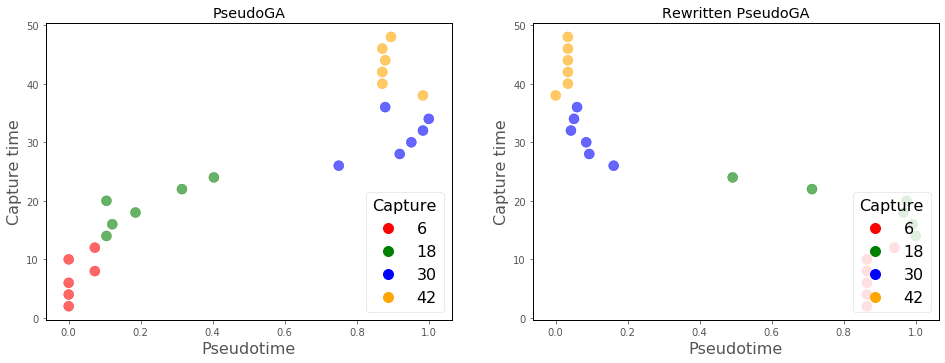

In [121]:
mdata = pd.read_csv('WindramMetaData.csv', index_col = [0])

actual_capture_time = mdata['capture.orig'].values
#print(actual_capture_time)
pseudotime = list(Pseudotime)

print(pseudotime)

pseudotime_pseudoGA = [.00000000, 0.00000000, 0.00000000, 0.07258065, 0.00000000, 0.07258065, 
                       0.10483871, 0.12096774, 0.18548387, 0.10483871, 0.31451613, 0.40322581, 0.75000000, 0.91935484, 0.95161290, 0.98387097, 1.00000000, 0.87903226,0.98387097, 0.87096774, 0.87096774, 0.87903226, 0.87096774, 0.89516129  ]
                        #0.926829268
pseudotime_pseudoGA = list(pseudotime_pseudoGA)
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16, 12))
plt.subplot(2, 2, 1)
plot('PseudoGA', 'Pseudotime', 'Capture time', pseudotime_pseudoGA, actual_capture_time, mdata['capture'].values)
plt.subplot(2, 2, 2)
plot('Rewritten PseudoGA', 'Pseudotime', 'Capture time', pseudotime, actual_capture_time, mdata['capture'].values)

In [80]:
%matplotlib inline
#from utils import plot
from matplotlib import pyplot as plt
import seaborn as sns
#0.014925373134328358, 0.014925373134328358, 0.014925373134328358, 0.3219616204690831, 0.014925373134328358, 0.3219616204690831, 0.19402985074626866, 0.0831556503198294, 0.0, 0.19402985074626866, 0.34328358208955223, 0.2707889125799573, 0.746268656716418, 1.0, 0.8656716417910447, 0.7014925373134329, 0.7910447761194029, 0.6119402985074627, 0.7313432835820896, 0.6865671641791045, 0.6865671641791045, 0.8507462686567164, 0.6865671641791045, 0.7313432835820896
#1.0, 1.0, 1.0, 0.875, 1.0, 0.875, 0.75, 0.8611111111111112, 0.7777777777777778, 0.75, 0.4722222222222222, 0.3194444444444444, 0.3055555555555556, 0.20833333333333334, 0.18055555555555555, 0.2638888888888889, 0.1527777777777778, 0.1527777777777778, 0.0, 0.06944444444444445, 0.06944444444444445, 0.08333333333333333, 0.06944444444444445, 0.3055555555555556

In [79]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import  numpy as np
import  pandas as pd
from collections import OrderedDict
from cycler import cycler
import warnings
warnings.filterwarnings('ignore')

matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'black'
# plt.rc('axes', color_cycle=['royalblue', 'orange', 'green', 'red', 'blueviolet', 'sienna', 'hotpink', 'gray', 'y', 'c'])
# plt.rc('axes', color_cycle=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y'])
plt.rc('axes', prop_cycle=cycler(color=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y']))
# axes.prop_cycle : cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])


def plot(title, xLabel, yLabel, xData, yData, cpt, xErr=None, **kwargs):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    # plt.figure(figsize=(8, 6))
    plt.title( '%s' % ( title ) )
    plt.xlabel('%s' % (xLabel), fontsize=16)
    plt.ylabel('%s' % (yLabel), fontsize=16)

    cellCapture = OrderedDict((('6', 'red'), ('18', 'green'), ('30', 'blue'), ('42', 'orange')))
    color_map = [0 for i in range(len(cpt))]

    for i in range(0, len(cpt)):
        if cpt[i] == 6:
            color_map[i] = 'red'
        elif cpt[i] == 18:
            color_map[i] = 'green'
        elif cpt[i] == 30:
            color_map[i] = 'blue'
        else:
            color_map[i] = 'orange'

    if 'datset' in kwargs:
        cellCapture = OrderedDict((('0', 'red'), ('2', 'green'), ('4', 'blue'), ('7', 'orange')))
        for i in range(0, len(cpt)):
            if cpt[i] == 1:
                color_map[i] = 'red'
            elif cpt[i] == 2:
                color_map[i] = 'green'
            elif cpt[i] == 3:
                color_map[i] = 'blue'
            else:
                color_map[i] = 'orange'

    # print(cellCapture)
    markers = [plt.Line2D([0, 0], [0, 0], color=color, marker='o', ms=10, linestyle='') for color in cellCapture.values()]

    plt.scatter(xData, yData, 100, c=color_map, alpha=0.6)
    if xErr is not None:
        plt.errorbar(xData, yData, xerr=xErr, fmt='none', marker='none', ecolor=color_map)

    # l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', bbox_to_anchor=(1.1, 0.5), loc=10, fontsize=16)
    l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', loc=4, fontsize=16)
    plt.setp(l.get_title(), fontsize=16)
    # plt.show()
